In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API endpoint for COVID-19 data
url = "https://api.covidtracking.com/v1/us/daily.json"

# Making a GET request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    print("Data fetched successfully!")
else:
    print("Failed to fetch data")


Data fetched successfully!


In [3]:
# Convert JSON response into a list of dictionaries
data = response.json()

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display first few rows
df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [4]:
# Convert 'Date' Column to datetime format for easier handling
df['date'] = pd.to_datetime(df['date'])

# Select relevant columns
df_filtered = df[['date', 'positive']]

# Display first few rows of filtered DataFrame
df_filtered.head()

,date,positive
0,1970-01-01 00:00:00.020210307,28756489.0
1,1970-01-01 00:00:00.020210306,28714654.0
2,1970-01-01 00:00:00.020210305,28654639.0
3,1970-01-01 00:00:00.020210304,28585852.0
4,1970-01-01 00:00:00.020210303,28520365.0


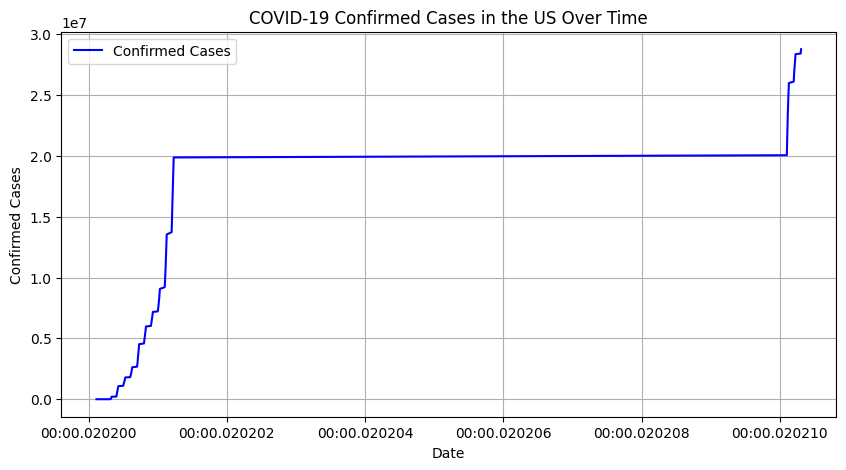

In [5]:
# Plot data
plt.figure(figsize=(10,5))
plt.plot(df_filtered['date'], df_filtered['positive'], label="Confirmed Cases", color='b')

# Adding labels and title
plt.title('COVID-19 Confirmed Cases in the US Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.legend()

plt.show()